# **About Author**
- Name: Hasaam Hasan Khan
 
- Location: Karachi , Pakistan

- LinkedIn: [Hasaan Khan LinkedIn](https://www.linkedin.com/in/hasaan-khan-422249289/)

- Github: [Hasaan Khan Github](https://github.com/hasaankhan175)

- Kaggle: [Hasaan Khan Kaggle](https://www.kaggle.com/hasaankhan175)


# **About Dataset**

## **Columns**
- RowNumber—corresponds to the record (row) number and has no effect on the output.

- CustomerId—contains random values and has no effect on customer leaving the bank.

- Surname—the surname of a customer has no impact on their decision to leave the bank.

- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

- Geography—a customer’s location can affect their decision to leave the bank.

- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are 
less likely to leave the bank compared to those with lower balances.

- NumOfProducts—refers to the number of products that a customer has purchased through the bank.

- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

- IsActiveMember—active customers are less likely to leave the bank.

- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

- Exited—whether or not the customer left the bank.


## **Acknowledgements:**

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# **What We are going to do with the data** ***?***

- EDA(exploratory Data Analysis): In this file we are going to do EDA on the dataset by performing different statistical function over the data. And plotting for better seek of the data

- Model Building: In this file we are going to build the model to predict the customer leaving or not by deep learning.

- Neural Network: In this file we are going to build the neural network to predict the customer leaving or not by deep learning.


## **Import Libraries**

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

## **Import Dataset**

In [2]:
df = pd.read_csv('churn.csv')

## **EDA(Exploratory Data Anallysis)**

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f"The shape of the data is{df.shape} ")
print(f"The Row is {df.shape[0]}")
print(f"The Column is {df.shape[1]}")
print()
print(f"The Info of the data: {df.info()}")

The shape of the data is(10000, 14) 
The Row is 10000
The Column is 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
The Info of the data: 

The Exited is in int data type and has to be converted in Category data type.

In [5]:
# converting the Exited column into category 
df['Exited'] = df['Exited'].astype('category')

In [6]:
df['Exited'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
# Let's see the credit Score Column
print(f"The maximum value of Credit Score {df['CreditScore'].max()}")
print()
print(f"The minimum value of Credit Score {df['CreditScore'].min()}")
print()
print(f"The Average value of Credit Score {df['CreditScore'].mean()}")


The maximum value of Credit Score 850

The minimum value of Credit Score 350

The Average value of Credit Score 650.5288


Text(0.5, 1.0, 'Plot For Identifying Outliers')

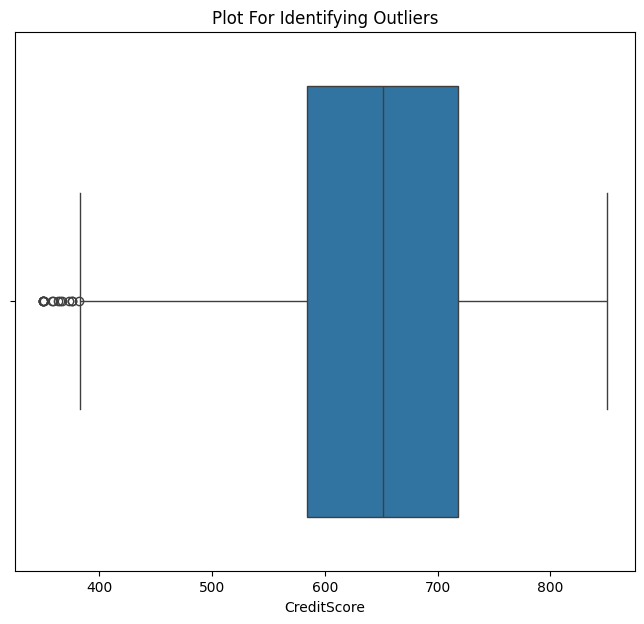

In [8]:
# Let's check that credit score column has outlier or not
plt.figure(figsize=(8,7))
sns.boxplot(df , x = 'CreditScore')
plt.title("Plot For Identifying Outliers")

In [9]:
import pandas as pd
from sklearn import svm

Credit_values = df['CreditScore'].values.reshape(-1, 1)
svm_model = svm.OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
svm_model.fit(Credit_values)

outliers = svm_model.predict(Credit_values) == -1
df = df[~outliers]

In [10]:
# now lets check the shape of the data
df.shape

(9445, 14)

Text(0.5, 1.0, 'Plot For Identifying Outliers')

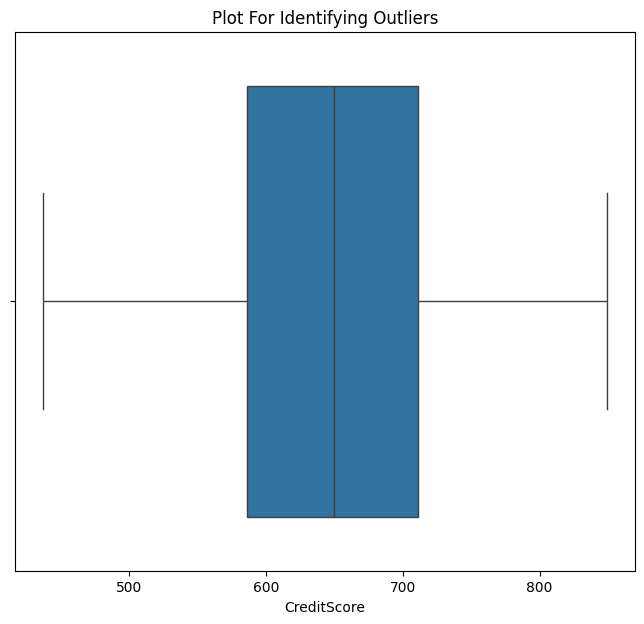

In [11]:
# Let's check that credit score column has outlier or not
plt.figure(figsize=(8,7))
sns.boxplot(df , x = 'CreditScore')
plt.title("Plot For Identifying Outliers")

In [12]:
# Lets see the geography column
df['Geography'].value_counts()

Geography
France     4742
Germany    2356
Spain      2347
Name: count, dtype: int64

In [13]:
# let's see the geography column through the plot 
import plotly.express as px
fig = px.histogram(df, x='Geography', color='Geography')
fig.show()

In [14]:
# Let's see the gender column
print(df['Gender'].value_counts())
print()
print(f"The count of Male in the Data set are {df['Gender'].value_counts()[0]}")
print(f"The count of Female in the Data set are {df['Gender'].value_counts()[1]}")


Gender
Male      5154
Female    4291
Name: count, dtype: int64

The count of Male in the Data set are 5154
The count of Female in the Data set are 4291


In [15]:
# let's see the Age column of the dataset

# The statistical decription of the data
df['Age'].describe()

count    9445.000000
mean       38.900476
std        10.481920
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

#### **Interpretation:**
- The average age of the customer is 38.
- The minimum is 18 and  the maximum is 92

Text(0.5, 1.0, 'The Age column of the data')

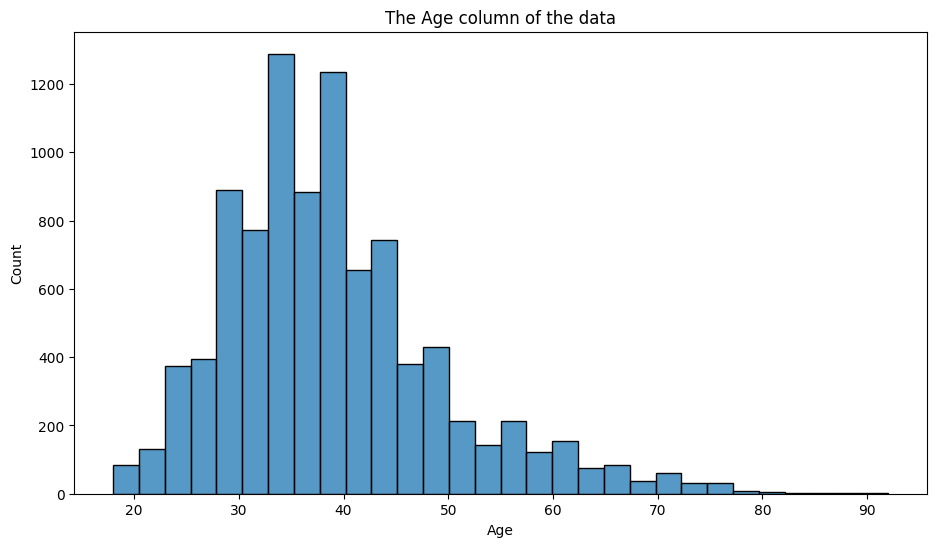

In [16]:
# plot the age column on histogram
plt.figure(figsize=(11,6)) # the fig size 
sns.histplot(df , x = 'Age' , bins=30)
plt.title("The Age column of the data") # the title of the plot

Text(0.5, 1.0, 'Plot For Identifying Outliers')

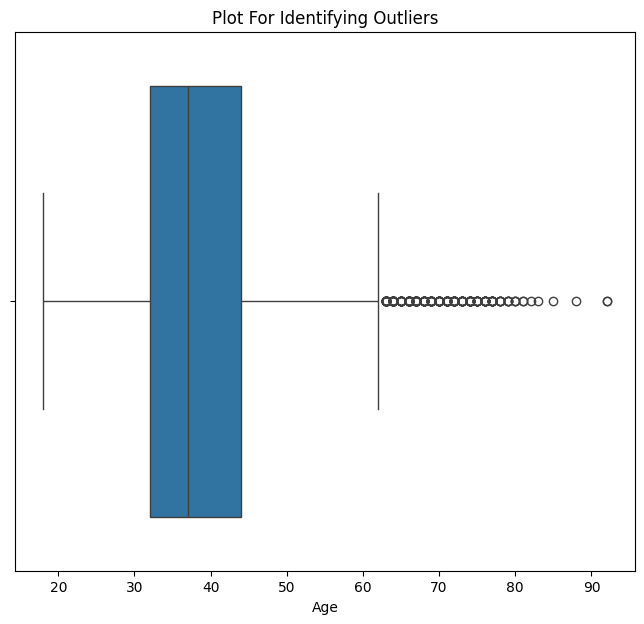

In [17]:
# Removing the  outliers from Age column but before removing it. let's draw the box plot of age column
plt.figure(figsize=(8,7))
sns.boxplot(df , x = 'Age')
plt.title("Plot For Identifying Outliers")

In [18]:
import pandas as pd
from sklearn import svm

Age_Values = df['Age'].values.reshape(-1, 1)
svm_model = svm.OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
svm_model.fit(Age_Values)

outliers = svm_model.predict(Age_Values) == -1
df = df[~outliers]

In [19]:
# let's see the tenure column of the data
print(df['Tenure'].describe())
print()
print(f"The maximum Tenure of the customer {df['Tenure'].max()}")
print(f"The minimum Tenure of the customer {df['Tenure'].min()}")
print(f"The Average Tenure of the customer {df['Tenure'].mean(): .0f}")

count    8237.000000
mean        5.008862
std         2.883111
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

The maximum Tenure of the customer 10
The minimum Tenure of the customer 0
The Average Tenure of the customer  5


In [20]:
# Let's see the column of Balance
df['Balance'].describe()

count      8237.000000
mean      76446.210214
std       62449.591727
min           0.000000
25%           0.000000
50%       97257.410000
75%      127837.540000
max      250898.090000
Name: Balance, dtype: float64

#### **Interpretation:**
- The average balance of the customer is 76k.
- The minimum is 0 and the maximum is 2 Million dollars.
- It is the important column and it has to be treated likely becuase the customer which has less balance are more likely to leave the bank.

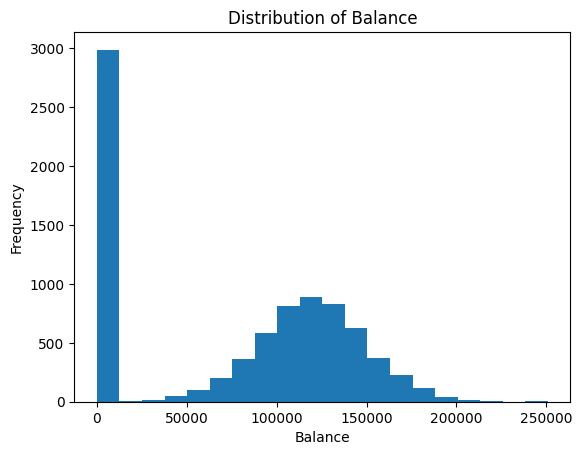

In [21]:
import matplotlib.pyplot as plt

# Generate a histogram
plt.hist(df['Balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

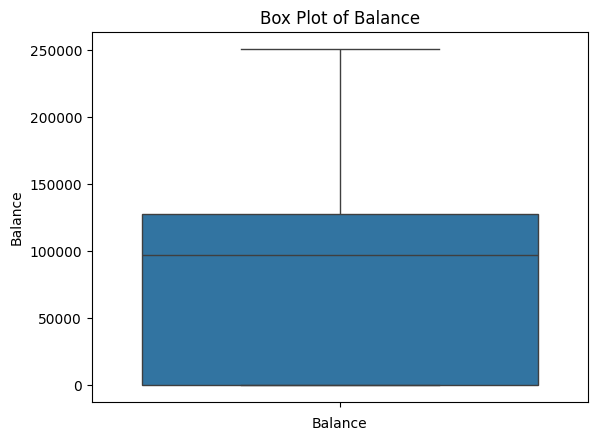

In [22]:
import seaborn as sns

# Generate a box plot
sns.boxplot(df['Balance'])
plt.xlabel('Balance')
plt.title('Box Plot of Balance')
plt.show()


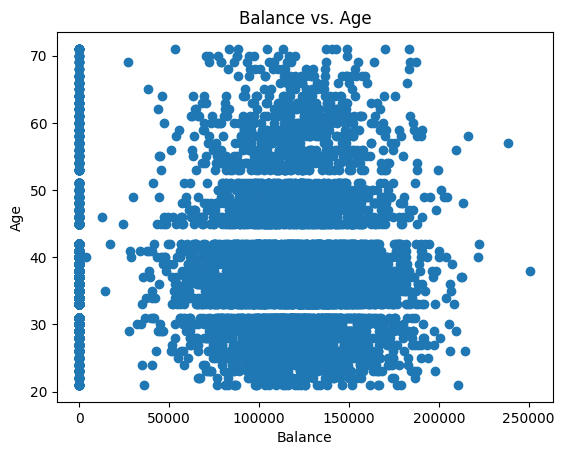

In [23]:
# Generate a scatter plot
plt.scatter(df['Balance'], df['Age'])
plt.xlabel('Balance')
plt.ylabel('Age')
plt.title('Balance vs. Age')
plt.show()

In [24]:
balance = df['Balance']
Q1 = balance.quantile(0.25)
Q3 = balance.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = (balance < lower_threshold) | (balance > upper_threshold)
num_outliers = outliers.sum()

if num_outliers > 0:
    print(f"The 'Balance' column has {num_outliers} outliers.")
    print(df[outliers])
else:
    print("No outliers found in the 'Balance' column.")

No outliers found in the 'Balance' column.


In [25]:
# let's see the num of product column in the data
df['NumOfProducts'].value_counts()

NumOfProducts
1    4160
2    3804
3     228
4      45
Name: count, dtype: int64

#### **Interpretation:**
- Most of the customers buy one product through the bank.

In [26]:
df['HasCrCard'].value_counts()

HasCrCard
1    5805
0    2432
Name: count, dtype: int64

#### **Interpretation:**
- Most of the customers has credit card.

In [27]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    4209
0    4028
Name: count, dtype: int64

#### **Interpretation:**
- Most of the customers are active member. 
- But there is no significance in the IsActiveMember column.

In [28]:
# let's see what the estimated salary column has
df['EstimatedSalary'].describe()

count      8237.000000
mean     100666.725670
std       57484.868786
min          11.580000
25%       51362.820000
50%      100687.670000
75%      149697.780000
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### **Interpretation:**
- The Maximum salary of one of the customer is 199k.
- The Minimum salary of one of the customer is 11.
- The Average salary of the customers is 100k.

In [29]:
# Let's see the Exited column
df['Exited'].value_counts()

Exited
0    6590
1    1647
Name: count, dtype: int64

#### **Interpretation:**
- The most customers in the data are not leaving the bank.

### **ALL Observations**: 
1. Most customers in the data are form France, second is Germany, And Spain is third.
2. The most customers in the Banks are Male as campared to Male
3. The Average age of the customers is 38.
4. The minimum age of the customer is 18.
4. The maximum age of the customer is 92.
5. The average number of tenure is 5. 
6. The minimum is 0. The maximum number of tenure is 10.
7. The avearage balance of the customer is 76 thousand dollars. The 75% of the customers have the balance of about 1 Millions. It is good indicator of Balance because the most the customer that has money in the bank are less likely to leave the bank.

## **Visualization AND Correlation**:

<Figure size 1000x600 with 0 Axes>

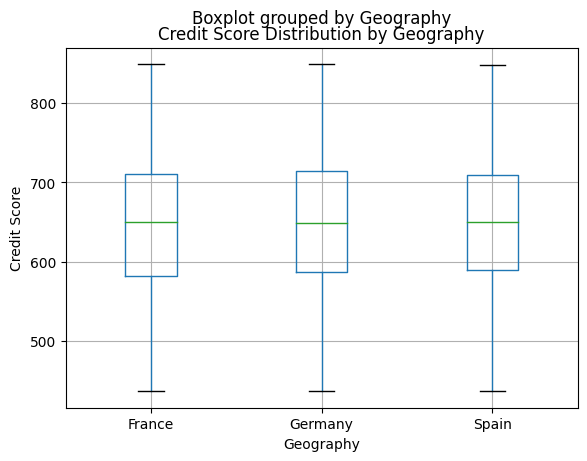

In [31]:
plt.figure(figsize=(10, 6))
df.boxplot(column='CreditScore', by='Geography')
plt.title('Credit Score Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()


#### **Interpretation:**
AS you can se the plot, The Average credit score is almost equal between the geography

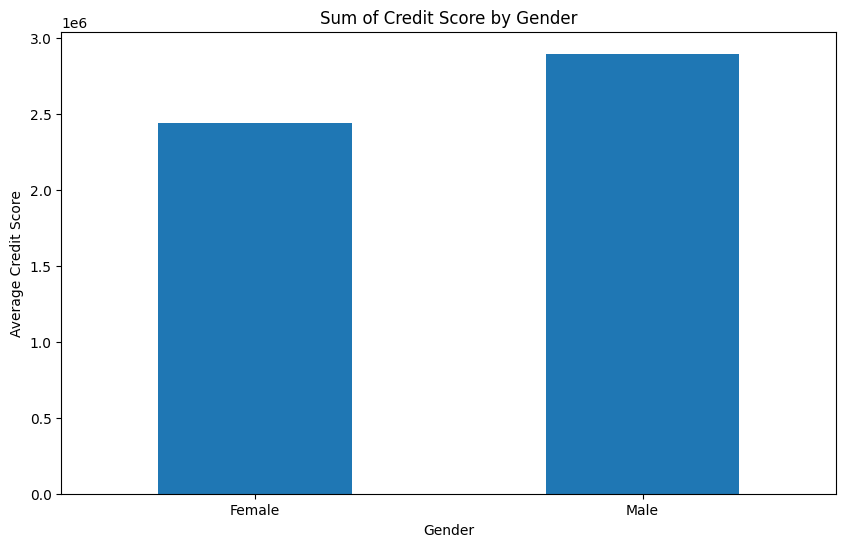

In [32]:
avg_credit_score = df.groupby('Gender')['CreditScore'].sum()
plt.figure(figsize=(10, 6))
avg_credit_score.plot(kind='bar')
plt.title('Sum of Credit Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=0)
plt.show()


#### **Interpretation:**

As you can see this plot. The plot is telling us that Male has more credit score sum than a Female. But if we see the credit score average of gender, The Average is almost equal onto the gender category.

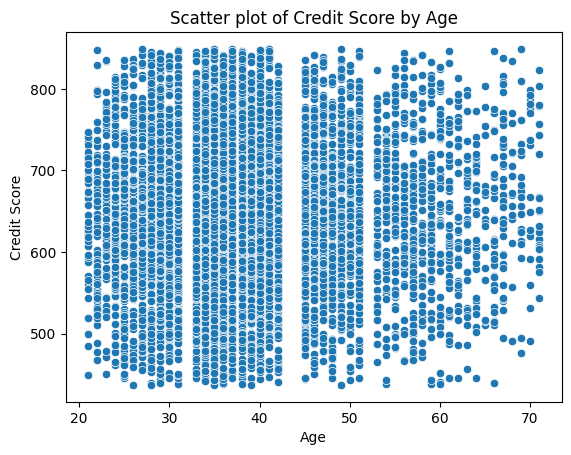

In [34]:
sns.scatterplot(df, x = 'Age' , y = "CreditScore")
plt.title('Scatter plot of Credit Score by Age')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

#### **Interpretation:**
As we can see the plot.The plot tells us that more people belongs to the age of 18 to 60 

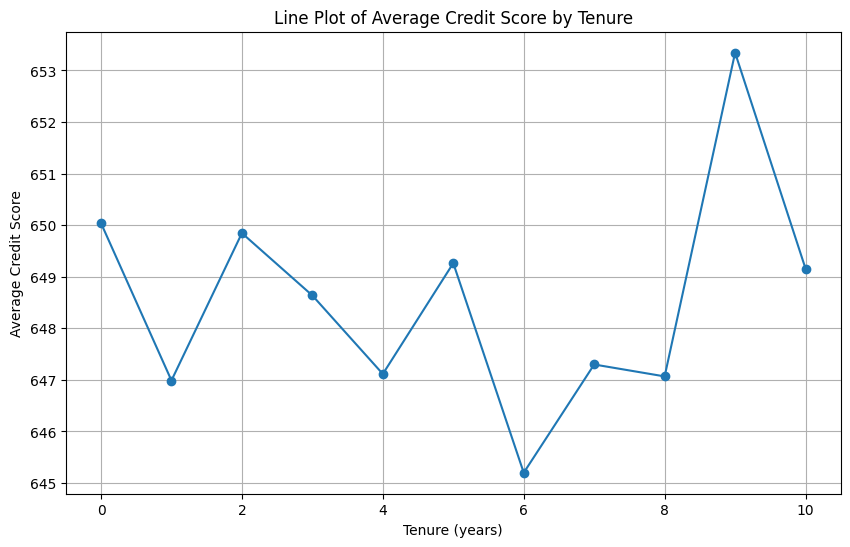

In [45]:
tenure_credit_avg = df.groupby('Tenure')['CreditScore'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(tenure_credit_avg['Tenure'], tenure_credit_avg['CreditScore'], marker='o')
plt.title('Line Plot of Average Credit Score by Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Average Credit Score')
plt.grid(True)
plt.show()

#### **Interpretation:**
- As we can see the plot. Those customers which have account for 9 Years, They have the highest credit score in the data.
- We can see in the plot that 6 tenure has less credit score in the bank.

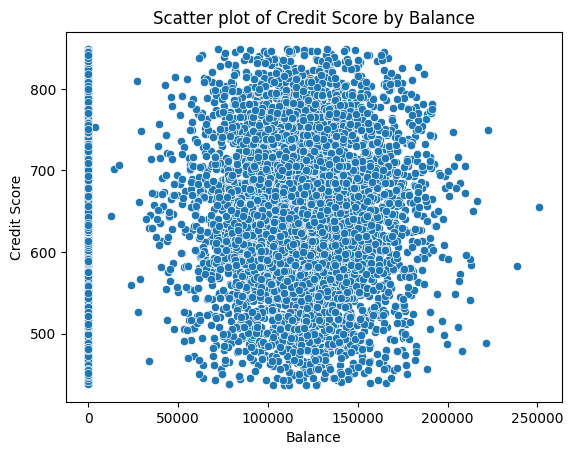

In [50]:
sns.scatterplot(df, x = 'Balance' , y = "CreditScore")
plt.title('Scatter plot of Credit Score by Balance')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.show()

#### **Interpretation:**
- The people which has 0 balance in the bank, They have highest credit score in the bank.
- The most of the customer has 50k to 200k cash in the bank. 

# **Model Building in Tensor Flow**

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing categorical/object columns

# List to store the encoded columns
encoded_columns = []

# Loop through each column in the DataFrame
for col in df.select_dtypes(include=['object']):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit LabelEncoder on the column and transform the column
    encoded_column = label_encoder.fit_transform(df[col])
    # Add the encoded column to the DataFrame
    df[col + '_encoded'] = encoded_column
    # Add the name of the encoded column to the list
    encoded_columns.append(col + '_encoded')



In [87]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Surname_encoded',
       'Geography_encoded', 'Gender_encoded'],
      dtype='object')

In [94]:
# Splitting the data into X and Y
X = df[['CreditScore', 'Geography_encoded',
       'Gender_encoded', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y =  df['Exited']

In [95]:
from sklearn.model_selection import train_test_split
# Splitting the X and Y into X_test, X_train, y_test and y_train
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32 , activation='relu' , input_shape =(X_train.shape[1] ,)) , 
    tf.keras.layers.Dense(16 , activation='relu' ) , 
    tf.keras.layers.Dense(8 , activation='relu' ) , 
    tf.keras.layers.Dense(1 , activation='relu' ) , 
])

In [101]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Epoch 1/100
206/206 [==============================] - 6s 5ms/step - loss: 7255.6631 - mae: 4.6324 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 2/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2006 - mae: 0.2006 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 3/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 4/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 5/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 6/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006 - val_loss: 0.1972 - val_mae: 0.1972
Epoch 6: early stopping


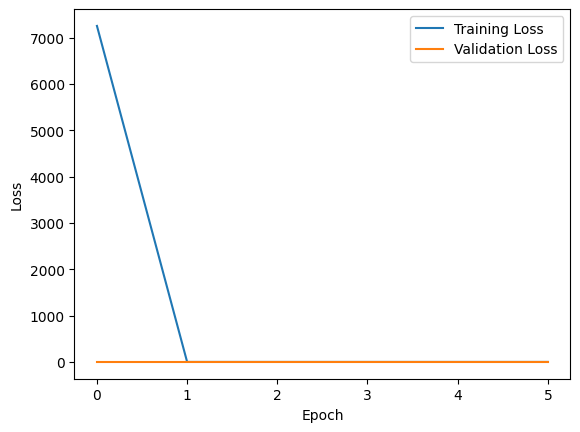

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping( patience=5, verbose=1)

# Train the model with EarlyStopping callback
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])

# Plot training history if needed
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

52/52 [==============================] - 0s 2ms/step - loss: 0.1972 - mae: 0.1972
Test Loss: 0.1972087323665619
Test MAE: 0.1972087323665619


In [106]:

model_path = 'my_model.h5'

# Save the model
model.save(model_path)

print("Model saved successfully to:", model_path)


c:\Users\Glow computers\miniconda3\envs\MachineEDA\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Model saved successfully to: my_model.h5
